##Library and PyPI

In [2]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Preprocessing

In [3]:
# load data into the dataset
dataset = pd.read_csv("https://salaries.freshremote.work/download/salaries.csv")

## Know your data

In [5]:
dataset.work_year.unique() 

array(['2022e', '2021', '2020', '2021e'], dtype=object)

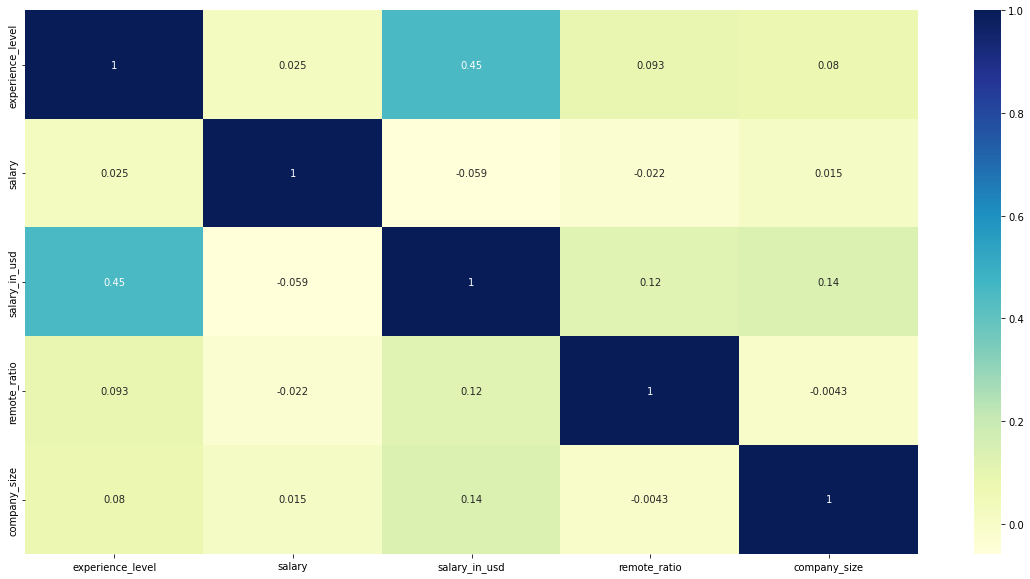

In [6]:
#check the correlation of the dataset
mapping = {'S': 1, 'M': 2,'L':3}
dataset=dataset.replace(to_replace="M",value=2)
dataset=dataset.replace(to_replace="L",value=3)
dataset=dataset.replace(to_replace="S",value=1)

dataset=dataset.replace(to_replace="EN",value=1)
dataset=dataset.replace(to_replace="MI",value=2)
dataset=dataset.replace(to_replace="SE",value=3)
dataset=dataset.replace(to_replace="EX",value=4)
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap = 'YlGnBu')
plt.savefig("correlation.png")

In [7]:
#split dataset by year
dataset_2021 = dataset[dataset["work_year"] == '2021']
dataset_2020 = dataset[dataset["work_year"] == '2020']
dataset_2021e = dataset[dataset["work_year"] == '2022e']

In [8]:
#  we need to know the difference between 2020, 2021e and 2021


# County IDs not in geometric data
dataset_2020_job = dataset_2020.job_title.unique()
dataset_2021_job = dataset_2021.job_title.unique()
dataset_2021e_job = dataset_2021e.job_title.unique()

# Find IDs only in one of the two county ID sets
# Find the set exclusive-or of two arrays.
unmatched_ids_20_21 = np.setxor1d(dataset_2021_job,dataset_2020_job) 
unmatched_ids_20_21e = np.setxor1d(dataset_2021e_job,dataset_2020_job) 
print(unmatched_ids_20_21)

['AI Scientist' 'Android Developer' 'Ansible Automation Engineer'
 'Application Security Engineer' 'Associate Product Manager'
 'Automation Engineer' 'Azure Cloud Engineer' 'Azure DevOps Engineer'
 'Big Data Engineer' 'Business Analyst' 'Business Data Analyst'
 'Business Intelligence Analyst' 'Business Operations Manager'
 'Chief Information Security Officer' 'Client Platform Engineer'
 'Cloud Architect' 'Cloud DevOps Systems Engineer'
 'Cloud Infrastructure Engineer' 'Cloud Operations Engineer'
 'Cloud Security Engineer' 'Computer Vision Engineer'
 'Concierge Security Engineer' 'Customer Service Representative'
 'Customer Success Manager' 'Customer Support Specialist'
 'Cyber Security Architect' 'Cyber Security Researcher'
 'Cyber Threat Analyst' 'Cyber Threat Intelligence Analyst'
 'Cybersecurity Analyst' 'Cybersecurity Engineer'
 'Cybersecurity Researcher' 'Data Engineer' 'Data Engineering Manager'
 'Data Science Consultant' 'Data Science Manager'
 'Database Reliability Engineer' 'D

In [9]:
# print(f"salary in 2020 but not in 2021: \n{dataset_2020[dataset_2020.job_title.isin(unmatched_ids_20_21)].job_title.unique()}")
data_in_20_not_in_21 = dataset_2020[dataset_2020.job_title.isin(unmatched_ids_20_21)].job_title.unique()
dataset[dataset.job_title == 'Associate Product Manager']
data_in_21_not_in_20 = dataset_2021[dataset_2021.job_title.isin(unmatched_ids_20_21)].job_title.unique()
# print(f"salary in 2021 but not in 2020: \n{dataset_2021[dataset_2021.job_title.isin(unmatched_ids_20_21)].job_title.unique()}")

# print(f"salary in 2020 but not in 2021e: \n{dataset_2020[dataset_2020.job_title.isin(unmatched_ids_20_21e)].job_title.unique()}")
# print(f"salary in 2021e but not in 2020: \n{dataset_2021e[dataset_2021e.job_title.isin(unmatched_ids_20_21e)].job_title.unique()}")

In [47]:
# we only consider the job title both in 2020 and 2021
pure_data_2020_def = dataset_2020.drop(dataset_2020[dataset_2020.job_title.isin(data_in_20_not_in_21)].index)
pure_data_2021_def = dataset_2021.drop(dataset_2021[dataset_2021.job_title.isin(data_in_21_not_in_20)].index)
#sort value
pure_data_2020_def = pure_data_2020_def.sort_values("salary_in_usd")
pure_data_2021_def = pure_data_2021_def.sort_values("salary_in_usd")
display(pure_data_2020_def.tail(10))
display(pure_data_2021_def.tail(10))

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1091,2020,3,FT,Cloud Engineer,180000,USD,180000,US,50,US,3
459,2020,2,FT,Security Engineer,192000,USD,192000,US,100,US,3
1210,2020,3,CT,Cyber Security Analyst,150000,GBP,192396,GB,100,GB,3
1166,2020,3,FT,Software Security Engineer,300000,AUD,206620,AU,100,US,3
955,2020,3,FT,DevOps Engineer,280000,CAD,208849,CA,50,CA,3
1117,2020,2,FT,Cloud DevOps Engineer,200000,EUR,228094,FR,100,FR,2
1186,2020,3,FT,Information Security Manager,252000,USD,252000,US,100,US,2
1127,2020,3,FT,DevOps Engineer,275000,USD,275000,US,100,US,3
1198,2020,3,FT,Security Engineer,300000,USD,300000,US,50,US,3
1320,2020,3,FT,Data Scientist,412000,USD,412000,US,100,US,3


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
102,2021,2,FT,Information Security Analyst,120000,USD,120000,US,100,US,3
18,2021,2,FT,Information Security Manager,128000,USD,128000,US,100,US,3
8,2021,2,FT,Security Engineer,130000,USD,130000,US,100,US,3
23,2021,3,FT,DevOps Engineer,120000,CHF,131245,CH,100,CH,1
98,2021,3,FT,Security Engineer,145000,USD,145000,US,50,US,3
105,2021,3,FT,Cyber Security Engineer,150000,USD,150000,US,100,US,3
25,2021,3,FL,Copywriter,220000,CAD,175477,CA,100,CA,3
89,2021,3,FT,Site Reliability Engineer,245000,USD,245000,US,100,US,3
104,2021,2,FT,Software Security Engineer,320000,USD,320000,US,50,US,3
94,2021,2,FT,Cyber Security Analyst,500000,USD,500000,KZ,100,KZ,1


## Fairness:

In [11]:
# about data scientist with junior experience level
data_scientist_2020 = pure_data_2020_def[pure_data_2020_def.job_title == "Data Scientist"]
data_scientist_2020_level =  (
    data_scientist_2020.groupby(["experience_level","employment_type"])
    .mean()
    .reset_index()
)
data_scientist_2020_level 

,experience_level,employment_type,salary,salary_in_usd,remote_ratio,company_size
0,1,FT,8.000000e+04,83863.000000,75.000000,1.000000
1,1,PT,1.900000e+04,21669.000000,50.000000,1.000000
2,2,FT,1.288123e+06,73722.444444,83.333333,1.777778
3,3,FT,1.973333e+05,200142.666667,83.333333,3.000000


In [12]:
data_scientist_2020_country =  (
    data_scientist_2020.groupby(["experience_level","employment_type","company_location"])
    .mean()
    .reset_index()
)
data_scientist_2020_country

,experience_level,employment_type,company_location,salary,salary_in_usd,remote_ratio,company_size
0,1,FT,DE,5.500000e+04,62726.000000,50.000000,1.0
1,1,FT,US,1.050000e+05,105000.000000,100.000000,1.0
2,1,PT,IT,1.900000e+04,21669.000000,50.000000,1.0
3,2,FT,ES,3.400000e+04,38776.000000,100.000000,2.0
4,2,FT,FR,3.700000e+04,42197.000000,50.000000,1.0
5,2,FT,GB,6.000000e+04,76958.000000,100.000000,1.0
6,2,FT,HU,1.100000e+07,35735.000000,50.000000,3.0
7,2,FT,LU,5.500000e+04,62726.000000,50.000000,1.0
8,2,FT,US,1.017775e+05,101777.500000,100.000000,2.0
9,3,FT,US,1.973333e+05,200142.666667,83.333333,3.0


In [13]:
data_scientist_2021 = pure_data_2021_def[pure_data_2021_def.job_title == "Data Scientist"]
data_scientist_2021_level =  (
    data_scientist_2021.groupby(["experience_level","employment_type"])
    .mean()
    .reset_index()
)
data_scientist_2021_level

# As man see here we do not have enough data in the 2021 definitive, so we use an estimate dataset

,experience_level,employment_type,salary,salary_in_usd,remote_ratio,company_size
0,1,FT,42000,49646,50,2


In [14]:
data_scientist_2021e = dataset_2021e[dataset_2021e.job_title == "Data Scientist"]
# there is no data scientist in 2021e

In [15]:
# classifier could be level, sensitive attribute could be country, we do not have any like false positive rate

## Hypothesis test: How big is the location influence for each level
Test whether the mean salary for each level differ across the location
Which conclusion can draw at the 1% significance level? USA and not USA

In [16]:
pure_data_2020_def.job_title.unique()

array(['DevOps Engineer', 'Cyber Security Analyst', 'Data Analyst',
       'Data Scientist', 'Cyber Security Specialist',
       'Cloud DevOps Engineer', 'Site Reliability Engineer',
       'Information Security Engineer', 'Penetration Tester',
       'Security Engineer', 'Cyber Security Engineer', 'Copywriter',
       'Information Security Analyst', 'Information Security Manager',
       'Cloud Engineer', 'Information Security Specialist',
       'Backend Software Engineer', 'IT Security Analyst',
       'Security Analyst', 'Digital Forensics Analyst',
       'Software Security Engineer'], dtype=object)

In [25]:
# we first need to select which belong to the AI and ML salaries
not_ai_jobs_2020 = ['Copywriter','Site Reliability Engineer','Penetration Tester','Backend Software Engineer']
pure_data_2020 = pure_data_2020_def.drop(pure_data_2020_def[pure_data_2020_def.job_title.isin(not_ai_jobs_2020)].index)
pure_data_2020_USA =  pure_data_2020[pure_data_2020.company_location=='US']
pure_data_2020_not_USA = pure_data_2020[pure_data_2020.company_location!='US']

In [18]:
pure_data_2020_not_USA.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
696,2020,1,PT,DevOps Engineer,240000,INR,3238,IN,100,IN,1
37,2020,1,FT,Cyber Security Analyst,425000,INR,5734,IN,100,IN,3
1376,2020,2,FT,Data Analyst,8000,USD,8000,PK,50,PK,3
730,2020,2,FT,DevOps Engineer,34000,ILS,9883,IL,50,IL,2
258,2020,1,FT,Data Analyst,10000,USD,10000,NG,100,NG,1


In [19]:
# group by different level
# we should set it to FT

pure_data_2020_USA_1 = pure_data_2020_USA[pure_data_2020_USA.experience_level == 1]
pure_data_2020_USA_1_FT = pure_data_2020_USA_1[pure_data_2020_USA_1.employment_type == 'FT']

pure_data_2020_not_USA_1 = pure_data_2020_not_USA[pure_data_2020_not_USA.experience_level == 1]
pure_data_2020_not_USA_1_FT = pure_data_2020_not_USA_1[pure_data_2020_not_USA_1.employment_type == 'FT']

print(pure_data_2020_USA_1_FT.salary_in_usd.mean())
print(pure_data_2020_not_USA_1_FT.salary_in_usd.mean())

78854.28571428571
41607.5


In [20]:
# t-test
import scipy
p = scipy.stats.ttest_ind(pure_data_2020_USA_1_FT.salary_in_usd, pure_data_2020_not_USA_1_FT.salary_in_usd, axis=0, equal_var=False).pvalue
print('p-value',p)
# p-value is less than or equal to the specified significance level α, the null hypothesis is rejected
# we reject the null hypothesis----> the average salary is different in USA and not USA

p-value 3.128771093496715e-06


## Which job earn more money?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


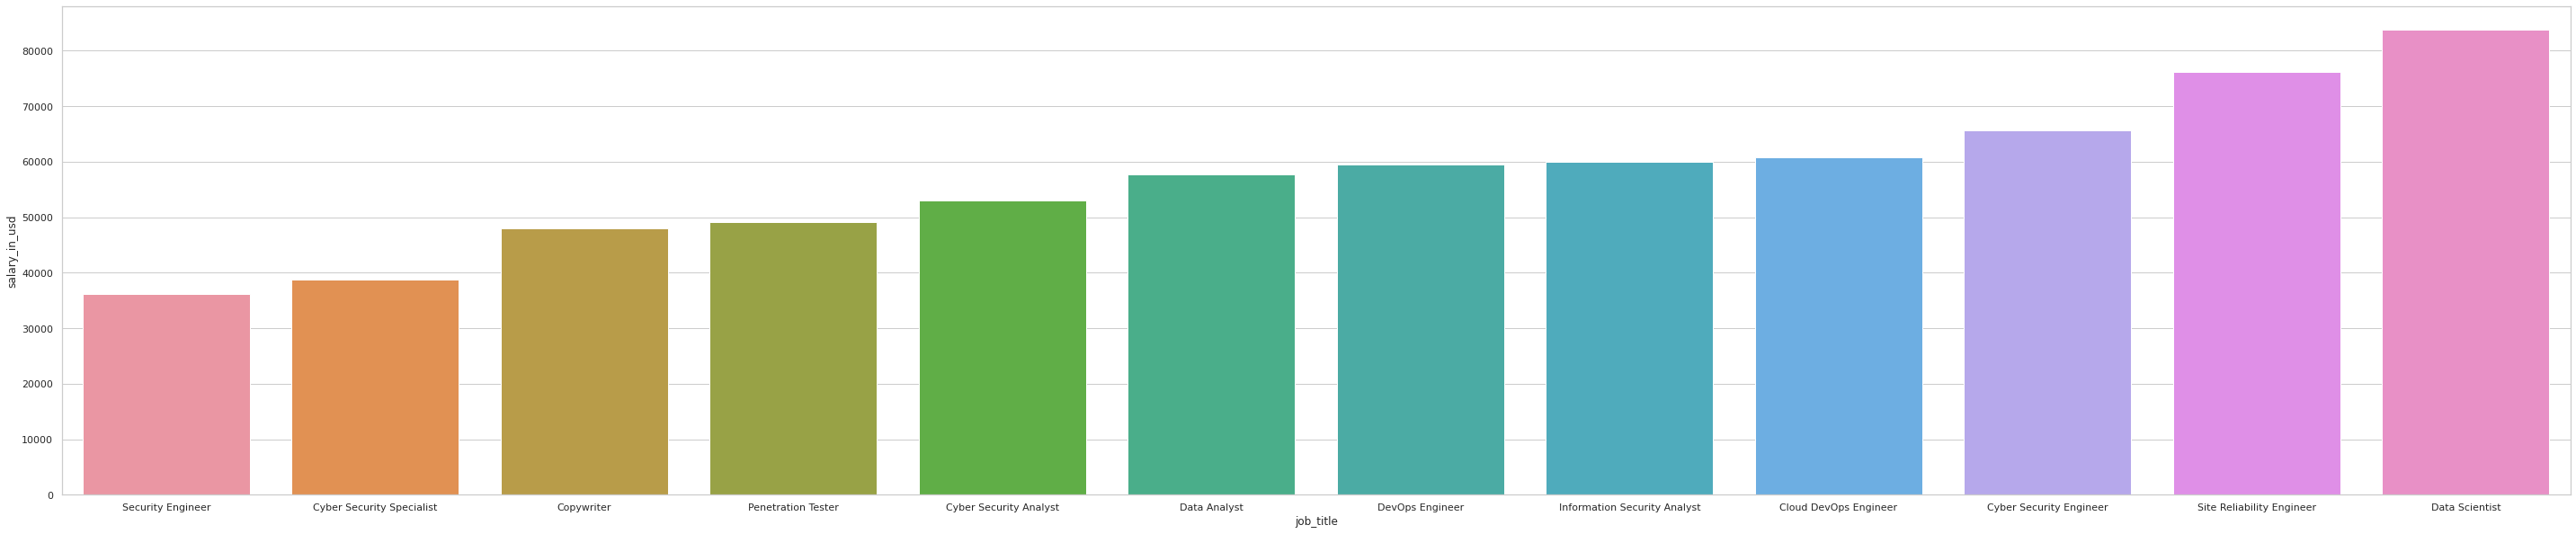

In [48]:
fig, ax = plt.subplots(figsize=(50,10))

pure_data_2020_FT = pure_data_2020_def[pure_data_2020_def.employment_type =='FT' ]
pure_data_2020_FT = (
    pure_data_2020_FT.groupby(["job_title","experience_level"])
    .mean()
    .reset_index()
)
pure_data_2020_FT_en = pure_data_2020_FT[pure_data_2020_FT.experience_level == 1]
pure_data_2020_FT_en = pure_data_2020_FT_en.sort_values('salary_in_usd')
sns.set_theme(style="whitegrid")
sns.color_palette("rocket")
ax = sns.barplot("job_title", "salary_in_usd", data=pure_data_2020_FT_en)
plt.savefig('junior_salary_plot_2020.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


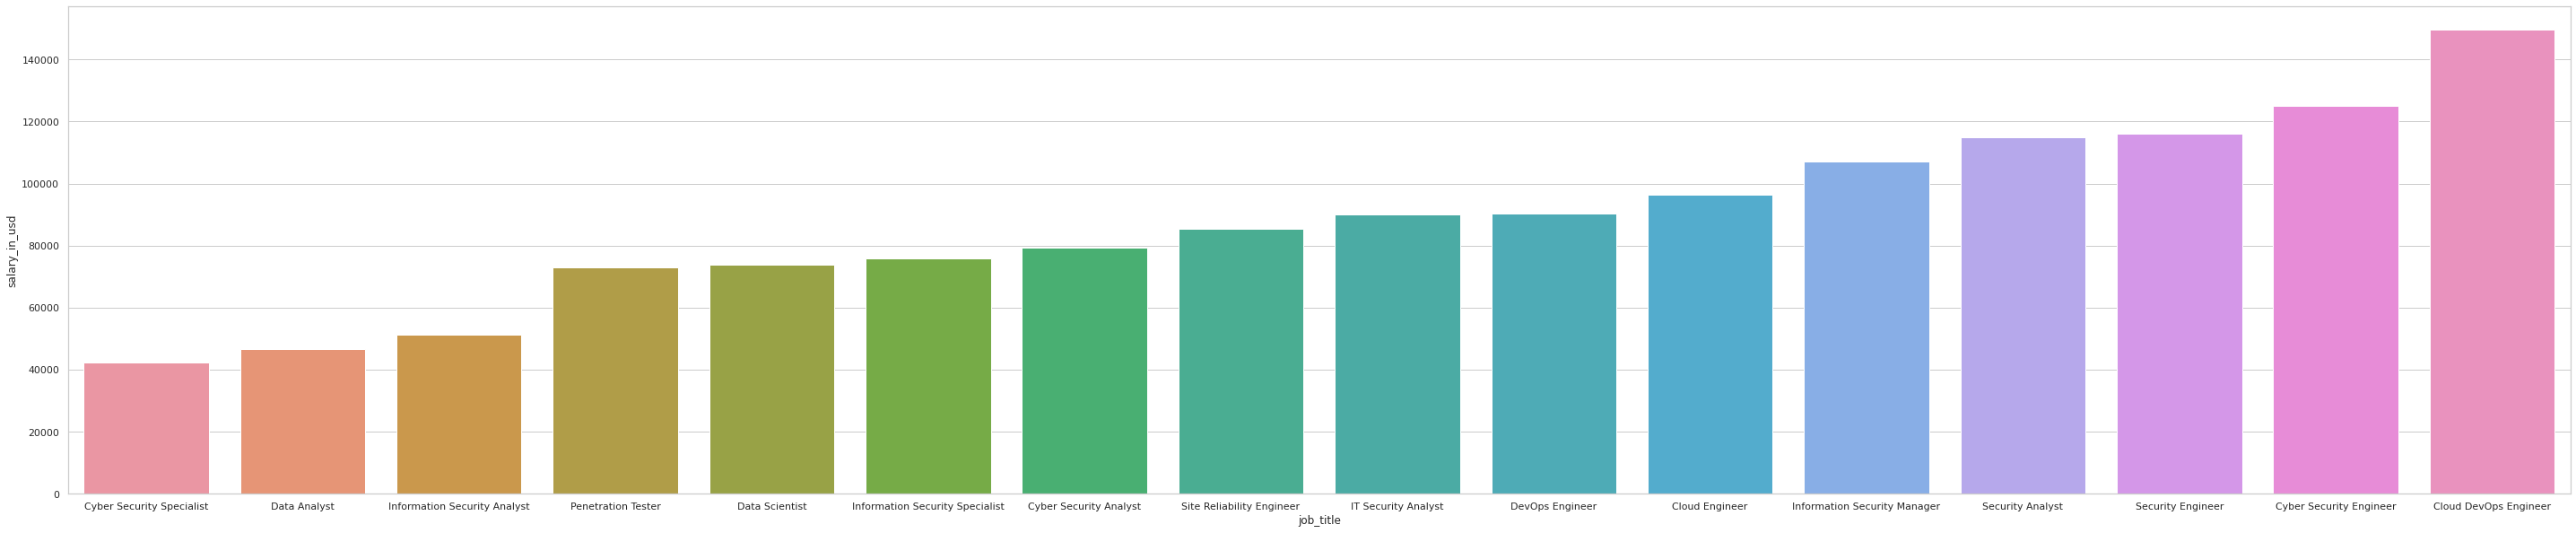

In [49]:
fig, ax = plt.subplots(figsize=(50,10))
pure_data_2020_FT_mi = pure_data_2020_FT[pure_data_2020_FT.experience_level == 2]
pure_data_2020_FT_mi = pure_data_2020_FT_mi.sort_values('salary_in_usd')
sns.set_theme(style="whitegrid")
sns.color_palette("rocket")
ax = sns.barplot("job_title", "salary_in_usd", data=pure_data_2020_FT_mi)
plt.savefig('intermediate_salary_plot_2020.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


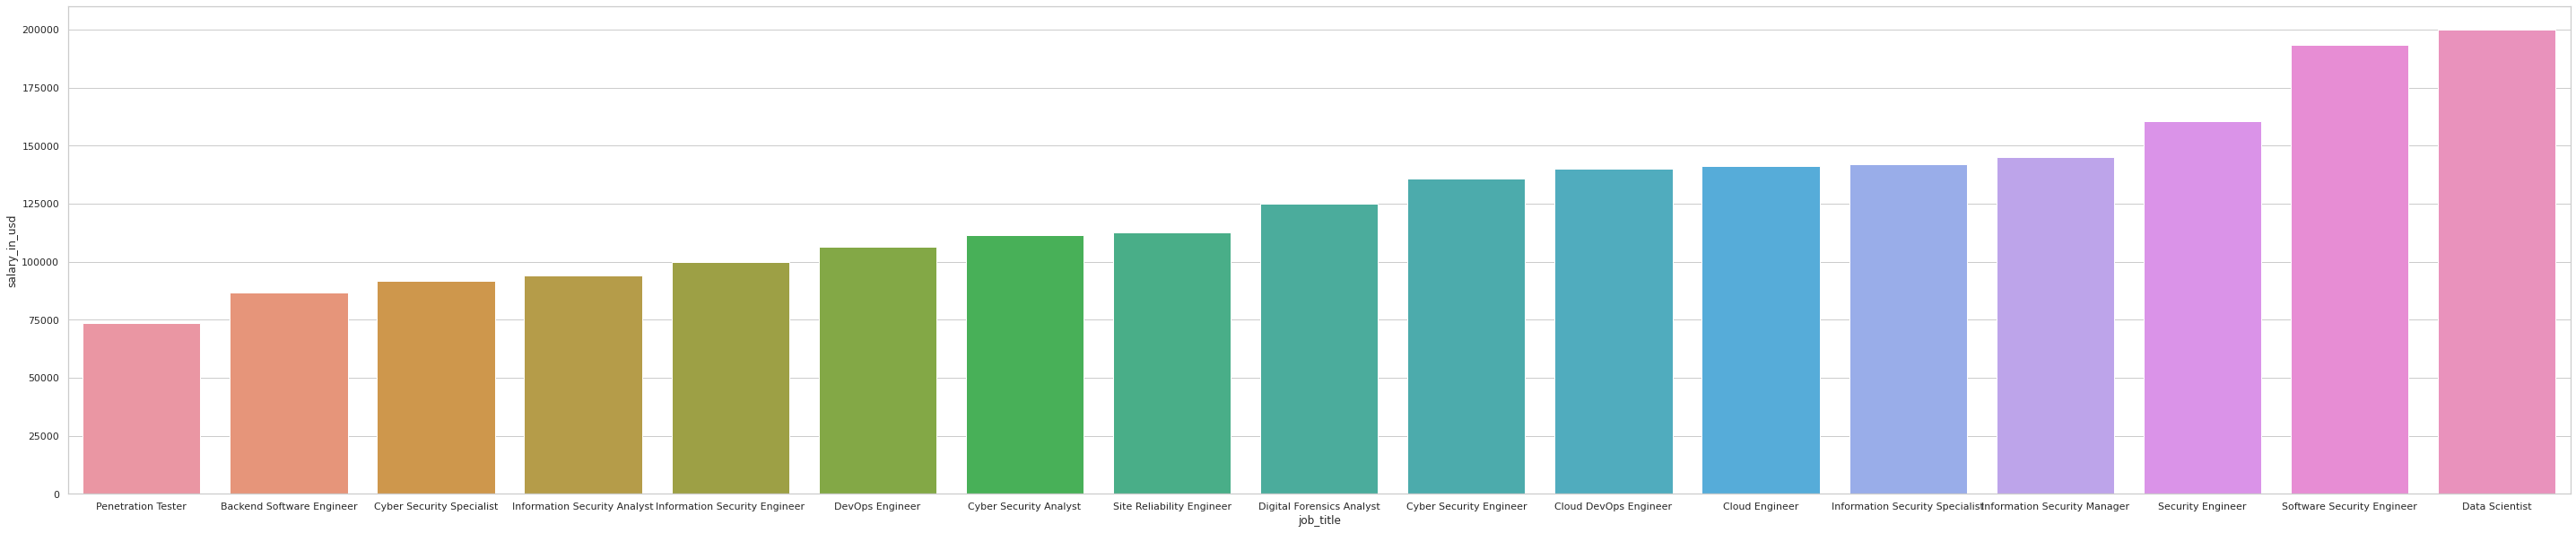

In [50]:
fig, ax = plt.subplots(figsize=(50,10))
pure_data_2020_FT_ex = pure_data_2020_FT[pure_data_2020_FT.experience_level == 3]
pure_data_2020_FT_ex = pure_data_2020_FT_ex.sort_values('salary_in_usd')
sns.set_theme(style="whitegrid")
sns.color_palette("rocket")
ax = sns.barplot("job_title", "salary_in_usd", data=pure_data_2020_FT_ex)
plt.savefig('senior_salary_plot_2020.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


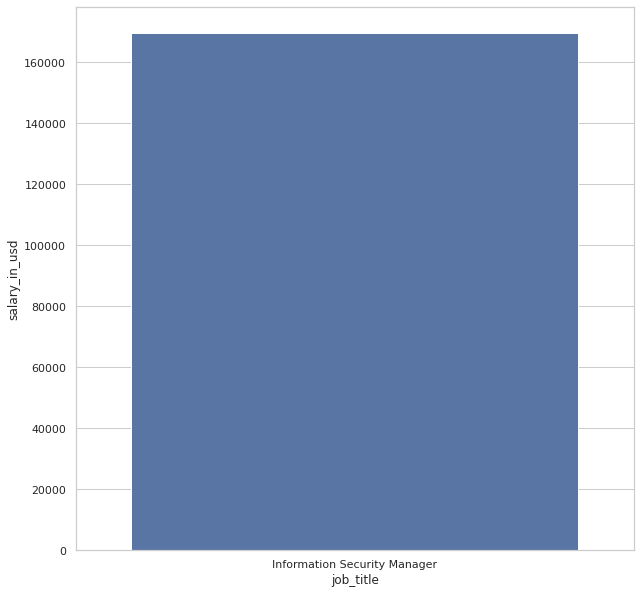

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
pure_data_2020_FT_di = pure_data_2020_FT[pure_data_2020_FT.experience_level == 4]
pure_data_2020_FT_di = pure_data_2020_FT_di.sort_values('salary_in_usd')
sns.set_theme(style="whitegrid")
sns.color_palette("rocket")
ax = sns.barplot("job_title", "salary_in_usd", data=pure_data_2020_FT_di)
plt.savefig('executive_salary_plot_2020.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


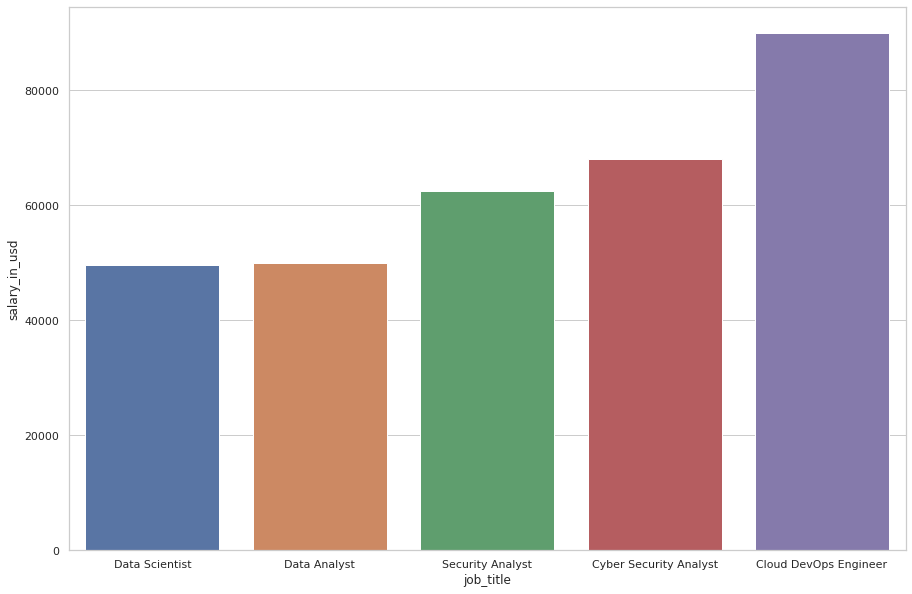

In [57]:
fig, ax = plt.subplots(figsize=(15,10))

pure_data_2021_FT = pure_data_2021_def[pure_data_2021_def.employment_type =='FT' ]
pure_data_2021_FT = (
    pure_data_2021_FT.groupby(["job_title","experience_level"])
    .mean()
    .reset_index()
)
pure_data_2021_FT_en = pure_data_2021_FT[pure_data_2021_FT.experience_level == 1]
pure_data_2021_FT_en = pure_data_2021_FT_en.sort_values('salary_in_usd')
sns.set_theme(style="whitegrid")
sns.color_palette("rocket")
ax = sns.barplot("job_title", "salary_in_usd", data=pure_data_2021_FT_en)
plt.savefig('junior_salary_plot_2021.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


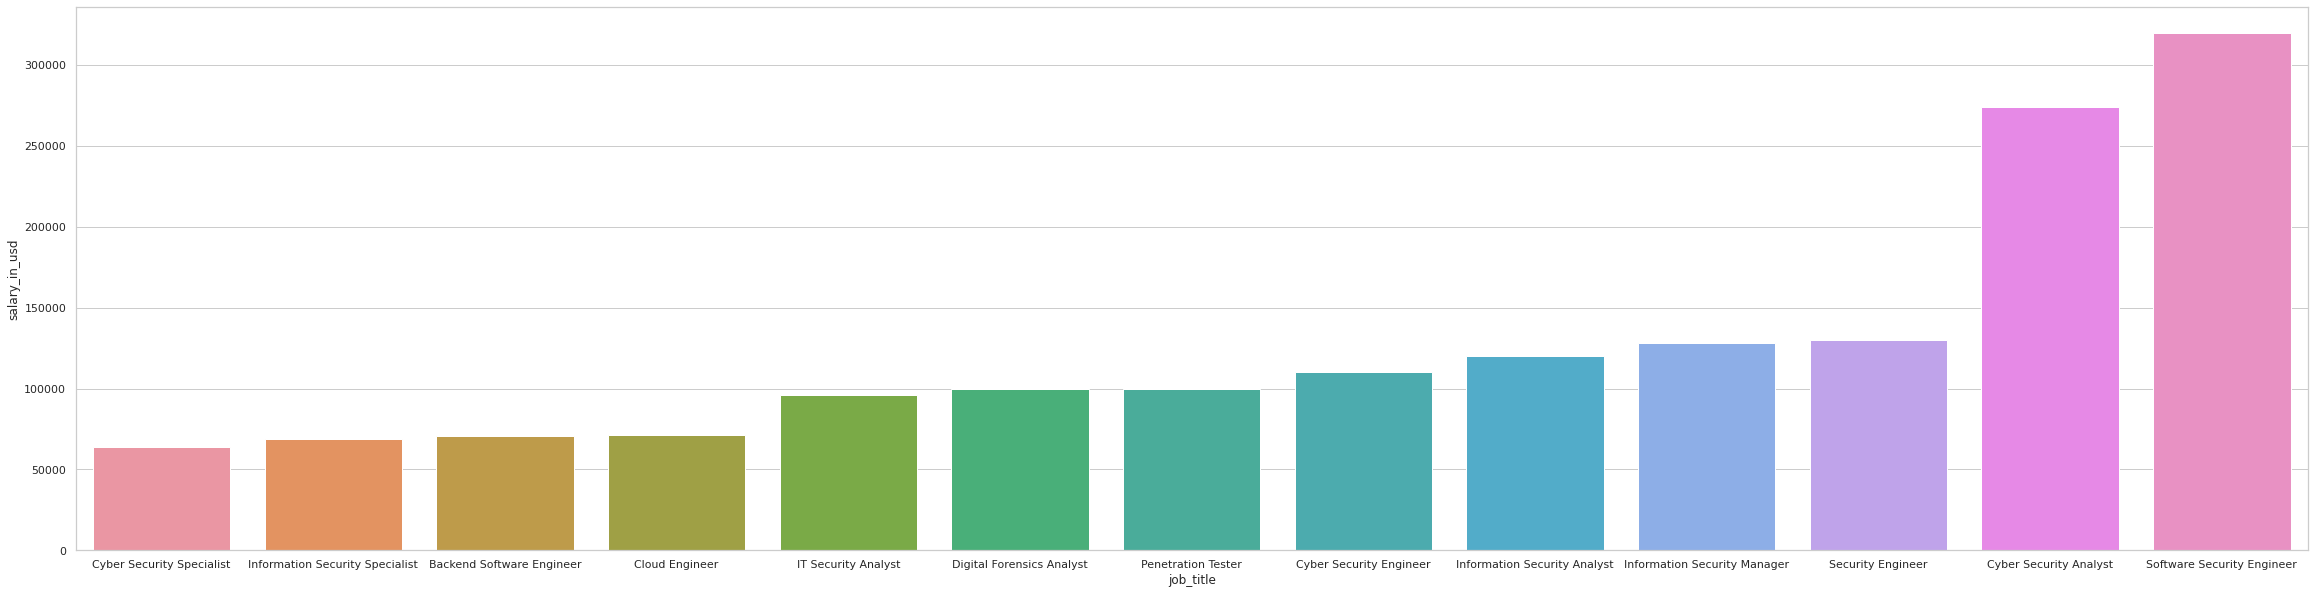

In [60]:
fig, ax = plt.subplots(figsize=(40,10))
pure_data_2021_FT_mi = pure_data_2021_FT[pure_data_2021_FT.experience_level == 2]
pure_data_2021_FT_mi = pure_data_2021_FT_mi.sort_values('salary_in_usd')
sns.set_theme(style="whitegrid")
sns.color_palette("rocket")
ax = sns.barplot("job_title", "salary_in_usd", data=pure_data_2021_FT_mi)
plt.savefig('intermediate_salary_plot_2021.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


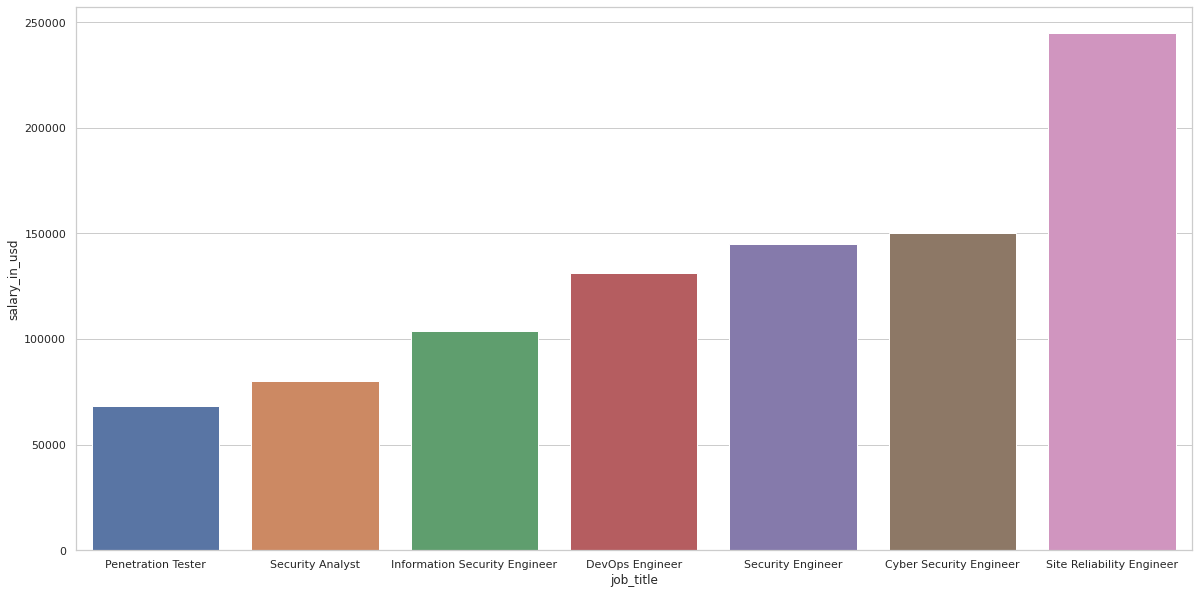

In [63]:
fig, ax = plt.subplots(figsize=(20,10))
pure_data_2021_FT_ex = pure_data_2021_FT[pure_data_2021_FT.experience_level == 3]
pure_data_2021_FT_ex = pure_data_2021_FT_ex.sort_values('salary_in_usd')
sns.set_theme(style="whitegrid")
sns.color_palette("rocket")
ax = sns.barplot("job_title", "salary_in_usd", data=pure_data_2021_FT_ex)
plt.savefig('senior_salary_plot_2021.png')

# Problems: